In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from collections import Counter

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_labels = [self.y_train[i] for i in k_indices]
        return Counter(k_labels).most_common(1)[0][0]

# Sample test
X = np.array([[1,2], [2,3], [3,3], [6,5], [7,7], [8,6]])
y = np.array([0, 0, 0, 1, 1, 1])
knn = KNN(k=3)
knn.fit(X, y)
print("Prediction for [5,5]:", knn.predict([[5,5]]))


Prediction for [5,5]: [1]


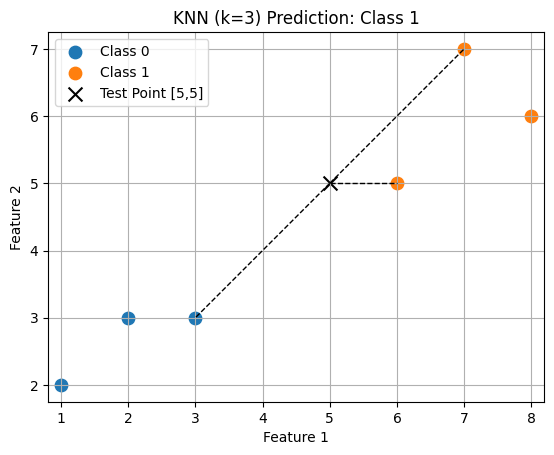

In [5]:
# Training data
X = np.array([[1, 2], [2, 3], [3, 3], [6, 5], [7, 7], [8, 6]])
y = np.array([0, 0, 0, 1, 1, 1])

# Test point
test_point = np.array([5, 5])

# Fit the model
knn = KNN(k=3)
knn.fit(X, y)

# Predict for test point
prediction = knn.predict([test_point])[0]

# Find 3 nearest neighbors
distances = [euclidean_distance(test_point, x_train) for x_train in X]
k_indices = np.argsort(distances)[:knn.k]

# Plot training points
for class_value in np.unique(y):
    plt.scatter(X[y == class_value, 0], X[y == class_value, 1], label=f"Class {class_value}", s=80)

# Plot test point
plt.scatter(test_point[0], test_point[1], color='black', label='Test Point [5,5]', marker='x', s=100)

# Draw lines to 3 nearest neighbors
for idx in k_indices:
    neighbor = X[idx]
    plt.plot([test_point[0], neighbor[0]], [test_point[1], neighbor[1]], 'k--', linewidth=1)

plt.title(f'KNN (k=3) Prediction: Class {prediction}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
